# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importing matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix, classification_report                              # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the images file of dataset
images = np.load('/content/drive/MyDrive/PG_AIML/CV/Project_PlantSeedlings/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/PG_AIML/CV/Project_PlantSeedlings/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)




*   There are 4750 images and corresponding labels in the dataset.
*   Images are of resolution 128x128 with 3 color channels.



## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### Plot random images from each class to see their differences

In [ ]:
def plot_images(images, labels):
  rows = 3
  cols = 4
  keys = dict(labels['Label'])
  fig = plt.figure(figsize=(12, 10))                                              # Defining the figure size to 12x10
  for i in range(cols):
    for j in range(rows):
      random_index = random.randint(0, len(labels))                               # Generating random indices from the data and plotting the images
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)                          # Adding subplots with 3 rows and 4 columns
      ax.imshow(images[random_index])
      ax.set_title(keys[random_index])
  plt.show()

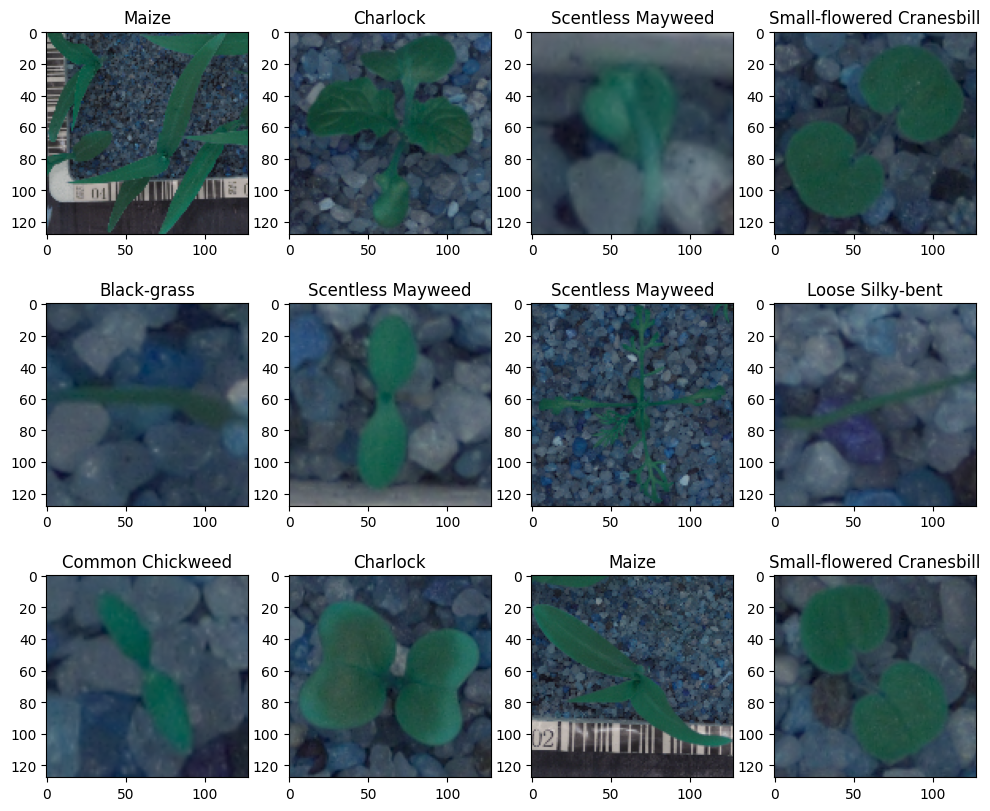

In [ ]:
plot_images(images, labels)



*   Plant pictures are taken in a top down format.
*   The difference between the plant classes can be identified by the leaf shape.
* The pictures looks to be in BGR format which is causing the Blue tint overall.



### Check the distribution of the dataset

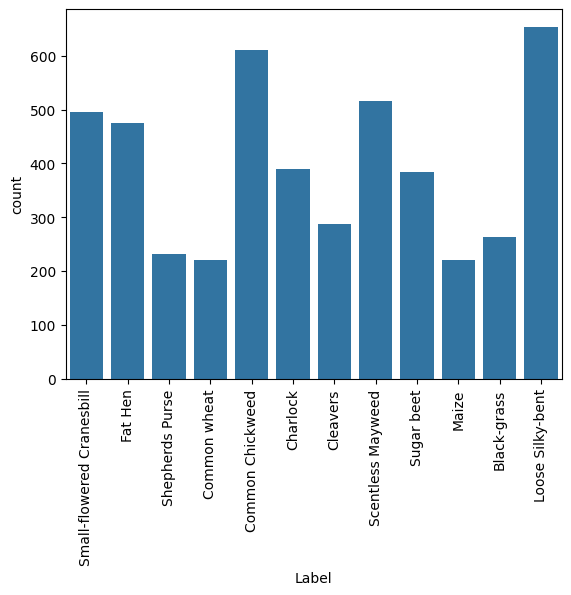

In [ ]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')
plt.show()

- The dataset is not evenly distributed.
- Some plants have only ~200 images while others range from ~300 to ~600 images.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

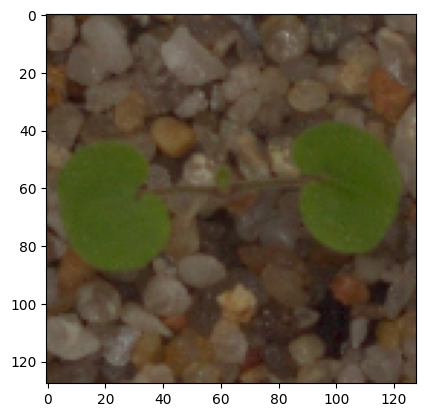

In [ ]:
plt.imshow(images[0])

**Image after resizing**

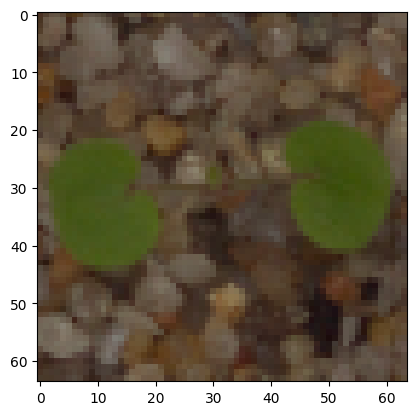

In [ ]:
plt.imshow(images_decreased[0])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.20, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

In [ ]:
# Print the shapes of train, validation, and test dataset
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2850, 64, 64, 3) (2850, 1)
(950, 64, 64, 3) (950, 1)
(950, 64, 64, 3) (950, 1)


### Encode the target labels

In [ ]:
# Convert labels from names to one hot vectors using LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [ ]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(2850, 12)
(950, 12)
(950, 12)


### Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be **scaling** - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [ ]:
# Clear the backend session
backend.clear_session()

In [ ]:
# Set the seed values for consistency
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intialize a sequential model
model1 = Sequential()

# Add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))

# Add the max-pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Add two similar convolution and max-pooling layers with activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Add a fully connected dense layer with 32 neurons
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))

# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Use the Adam Optimizer
opt = Adam()

# Compile the model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,804 (632.05 KB)

 Trainable params: 161,804 (632.05 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model on the training data

In [ ]:
history_1 = model1.fit(
    X_train_normalized, y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/30
90/90 - 6s - 64ms/step - accuracy: 0.1663 - loss: 2.3965 - val_accuracy: 0.2747 - val_loss: 2.1420
Epoch 2/30
90/90 - 1s - 11ms/step - accuracy: 0.3379 - loss: 1.9440 - val_accuracy: 0.4305 - val_loss: 1.7093
Epoch 3/30
90/90 - 1s - 14ms/step - accuracy: 0.4105 - loss: 1.6720 - val_accuracy: 0.4168 - val_loss: 1.6102
Epoch 4/30
90/90 - 1s - 11ms/step - accuracy: 0.4677 - loss: 1.5004 - val_accuracy: 0.5516 - val_loss: 1.3349
Epoch 5/30
90/90 - 1s - 11ms/step - accuracy: 0.5144 - loss: 1.3728 - val_accuracy: 0.4874 - val_loss: 1.4668
Epoch 6/30
90/90 - 1s - 10ms/step - accuracy: 0.5509 - loss: 1.2638 - val_accuracy: 0.6074 - val_loss: 1.1438
Epoch 7/30
90/90 - 1s - 13ms/step - accuracy: 0.5870 - loss: 1.1511 - val_accuracy: 0.5684 - val_loss: 1.1853
Epoch 8/30
90/90 - 1s - 14ms/step - accuracy: 0.6123 - loss: 1.1100 - val_accuracy: 0.6221 - val_loss: 1.0632
Epoch 9/30
90/90 - 1s - 14ms/step - accuracy: 0.6151 - loss: 1.0624 - val_accuracy: 0.6158 - val_loss: 1.0891
Epoch 10/3

### Model Evaluation

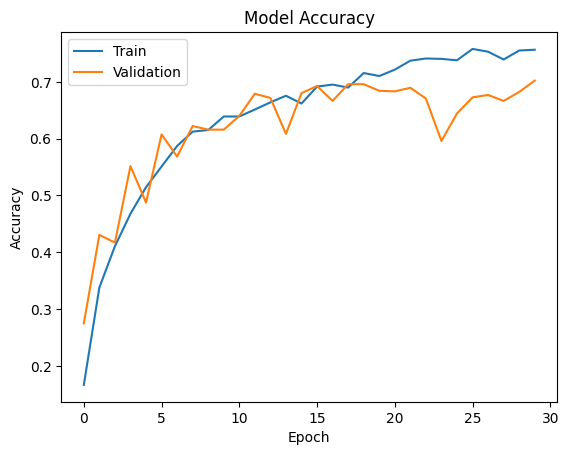

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- From the above plot, the model is showing better training accuracy than validation accuracy.
- The model seems to be overfitting by epoch 30 in this scenario.



### Evaluate the model on test data

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - 6ms/step - accuracy: 0.6958 - loss: 1.0464


### Plotting the Confusion Matrix

In [ ]:
# Get the output as probablities for each category
y_pred = model1.predict(X_test_normalized)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
print(y_pred)

[[1.32847642e-15 1.99734241e-05 2.43507776e-14 ... 7.49142615e-08
  9.20970678e-01 1.09228945e-11]
 [1.97927883e-13 1.81206822e-04 7.61477210e-08 ... 1.29697230e-02
  9.51230109e-01 2.52520040e-05]
 [2.26442442e-15 1.75630057e-20 3.47816498e-22 ... 2.48331935e-06
  2.12023736e-12 4.61859401e-07]
 ...
 [7.84026952e-07 2.39059555e-05 1.31470850e-04 ... 8.90137255e-02
  3.71302827e-04 2.18218174e-02]
 [1.19998319e-07 8.01210626e-11 1.03041083e-10 ... 2.55620596e-03
  7.45473869e-08 3.99794616e-03]
 [6.33347715e-12 4.16974302e-11 1.94525806e-13 ... 3.28007042e-02
  2.62469432e-04 1.84187855e-04]]


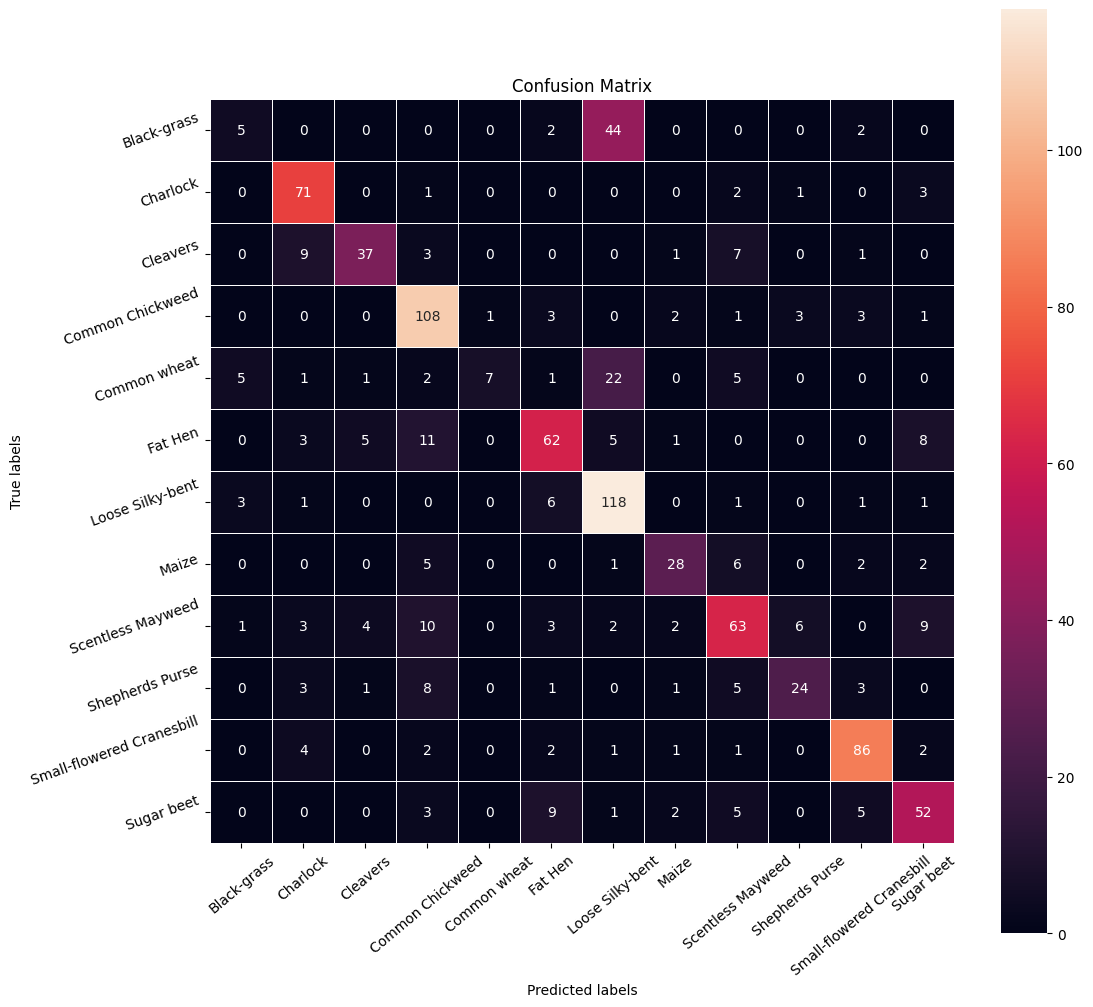

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred, axis=1)
y_test_arg=np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels on both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- We can observe that some of the classes are misclassified.
- The plants showing more misclassification are 'Black-grass', 'Common wheat', 'Scentless Mayweed', 'Fat Hen', & 'Sugar beet'.

### Plotting the Classification Report

In [ ]:
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.36      0.09      0.15        53
           1       0.75      0.91      0.82        78
           2       0.77      0.64      0.70        58
           3       0.71      0.89      0.79       122
           4       0.88      0.16      0.27        44
           5       0.70      0.65      0.67        95
           6       0.61      0.90      0.73       131
           7       0.74      0.64      0.68        44
           8       0.66      0.61      0.63       103
           9       0.71      0.52      0.60        46
          10       0.83      0.87      0.85        99
          11       0.67      0.68      0.67        77

    accuracy                           0.70       950
   macro avg       0.70      0.63      0.63       950
weighted avg       0.69      0.70      0.67       950



## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Functio to reduce the learning rate by monitoring the val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clear the backend session
backend.clear_session()

In [ ]:
# Set the seed values for consistency
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Code to set the rotation_range of the images to 20 degrees
train_datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest'
)

In [ ]:
# Intialize a sequential model
model2 = Sequential()

# Add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))

# Add the max-pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding='same'))

# Add two similar convolution and max-pooling layers with activation = relu
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2), padding='same'))
# Add a batch normalization layer
model2.add(BatchNormalization())

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Add a fully connected dense layer with 16 neurons
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))

# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Use the Adam Optimizer
opt = Adam()

# Compile the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,956 (1.08 MB)

 Trainable params: 282,892 (1.08 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Batch size to use
batch_size = 32

history_2 = model2.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False),
                      epochs=30,
                      validation_data=(X_val_normalized, y_val_encoded),
                      steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                      verbose=2,
                      callbacks=[learning_rate_reduction])

Epoch 1/30
89/89 - 9s - 106ms/step - accuracy: 0.3222 - loss: 1.9471 - val_accuracy: 0.1347 - val_loss: 2.4044 - learning_rate: 0.0010
Epoch 2/30
89/89 - 0s - 2ms/step - accuracy: 0.3750 - loss: 1.6056 - val_accuracy: 0.1284 - val_loss: 2.4183 - learning_rate: 0.0010
Epoch 3/30
89/89 - 5s - 57ms/step - accuracy: 0.5476 - loss: 1.3480 - val_accuracy: 0.1874 - val_loss: 2.4267 - learning_rate: 0.0010
Epoch 4/30
89/89 - 0s - 1ms/step - accuracy: 0.6875 - loss: 1.0264 - val_accuracy: 0.1958 - val_loss: 2.3912 - learning_rate: 0.0010
Epoch 5/30
89/89 - 3s - 36ms/step - accuracy: 0.5859 - loss: 1.1985 - val_accuracy: 0.3895 - val_loss: 1.8720 - learning_rate: 0.0010
Epoch 6/30
89/89 - 0s - 2ms/step - accuracy: 0.5000 - loss: 1.7495 - val_accuracy: 0.3863 - val_loss: 1.8925 - learning_rate: 0.0010
Epoch 7/30
89/89 - 5s - 53ms/step - accuracy: 0.6395 - loss: 1.0467 - val_accuracy: 0.5832 - val_loss: 1.5800 - learning_rate: 0.0010
Epoch 8/30
89/89 - 0s - 1ms/step - accuracy: 0.6250 - loss: 1.33

### Model Evaluation

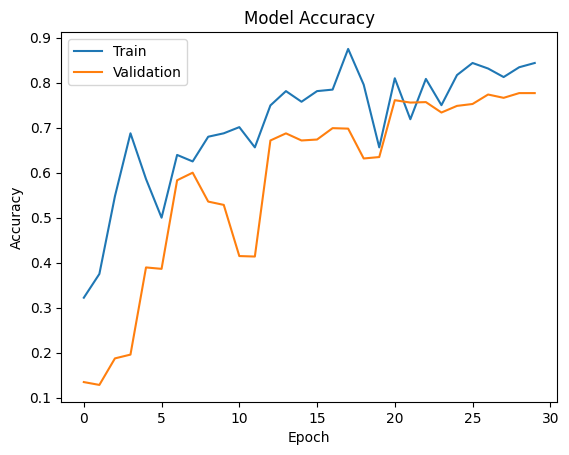

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- From the above plot, both the training accuracy and validation accuracy are showing similar improvements with less divergence.
- We are not seeing too much of overfitting in this case.

### Evaluate the model on test data

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - 3ms/step - accuracy: 0.7568 - loss: 0.7712


### Plotting the Confusion Matrix

In [ ]:
# Get the output as probablities for each category
y_pred = model2.predict(X_test_normalized)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
print(y_pred)

[[1.2187750e-17 3.4398486e-08 2.0223026e-15 ... 2.0337369e-02
  3.7899479e-06 3.8692743e-12]
 [7.4247419e-10 4.6563977e-03 2.7080217e-05 ... 5.7495385e-01
  3.0872586e-01 4.4825859e-04]
 [1.8558212e-05 5.2437922e-06 1.3237368e-05 ... 1.7219318e-02
  1.6171878e-04 4.9671036e-04]
 ...
 [4.2897383e-07 1.4782361e-03 3.2022177e-05 ... 1.3391054e-02
  7.1244899e-06 1.1220215e-02]
 [8.5852901e-03 5.9458301e-03 1.2424112e-02 ... 3.0202376e-02
  6.0883374e-03 5.1979326e-02]
 [1.0236637e-05 6.3721527e-05 8.7984277e-05 ... 3.7362337e-02
  2.5010188e-04 1.0543901e-02]]


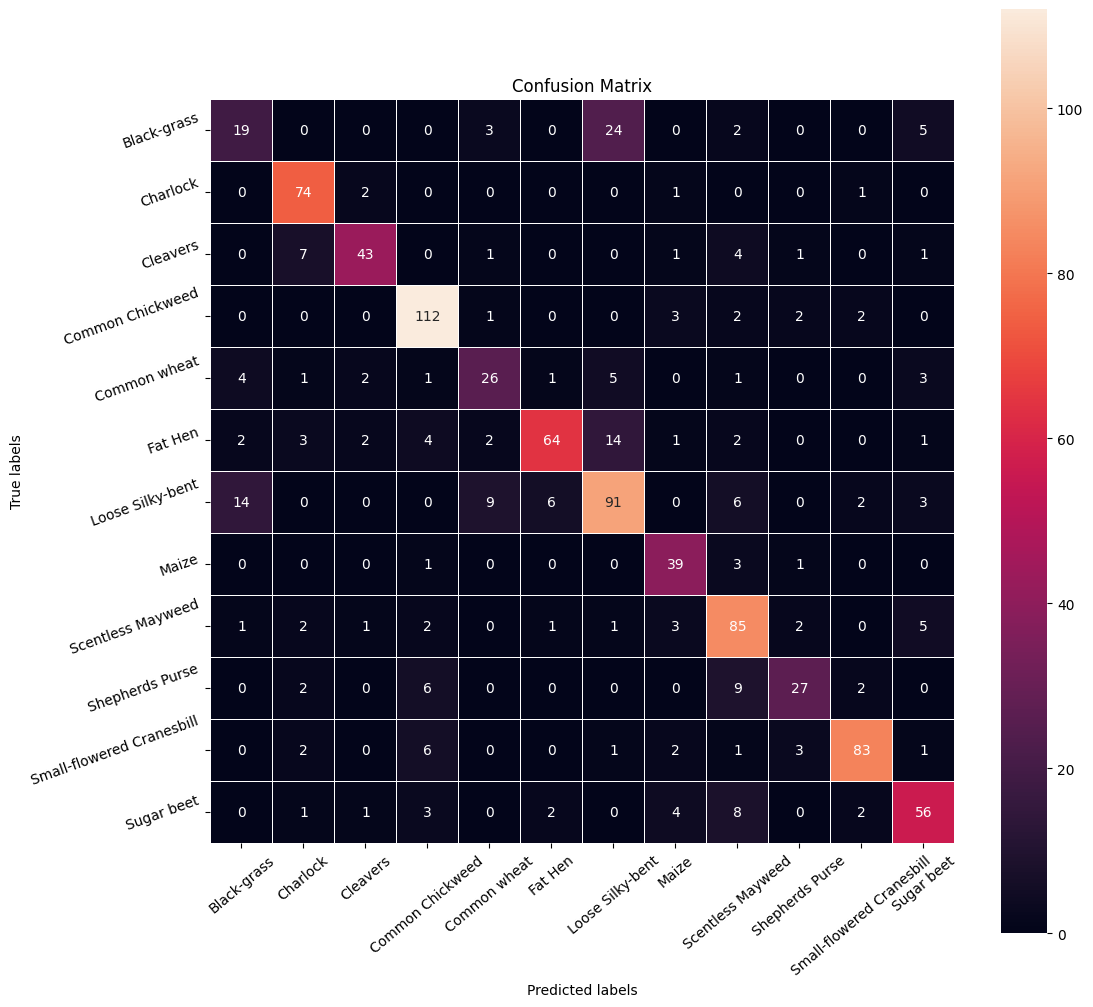

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred, axis=1)
y_test_arg=np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels on both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- We can see that most of the classes are correctly classified with couple of classes showing minor misclassification.

### Plotting the Classification Report

In [ ]:
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.36      0.41        53
           1       0.80      0.95      0.87        78
           2       0.84      0.74      0.79        58
           3       0.83      0.92      0.87       122
           4       0.62      0.59      0.60        44
           5       0.86      0.67      0.76        95
           6       0.67      0.69      0.68       131
           7       0.72      0.89      0.80        44
           8       0.69      0.83      0.75       103
           9       0.75      0.59      0.66        46
          10       0.90      0.84      0.87        99
          11       0.75      0.73      0.74        77

    accuracy                           0.76       950
   macro avg       0.74      0.73      0.73       950
weighted avg       0.76      0.76      0.75       950



## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

- Model2 shows better accuracy values compared to Model1 based on the Classification Reports.
- On comparing the Confusion Matrix of Model1 and Model2, Model2 classifies more plants correctly compared to Model1.
- Based on these findings, we will choose Model2 as our best model.

### Visualizing the prediction

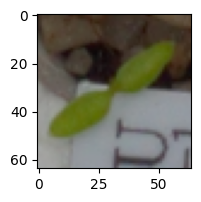

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Predicted Label: ['Common Chickweed']
True Label: Common Chickweed


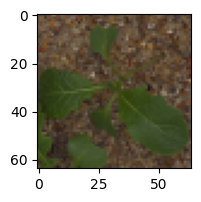

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Label: ['Charlock']
True Label: Charlock


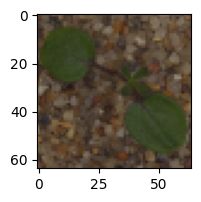

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label: ['Cleavers']
True Label: Cleavers


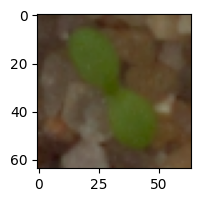

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label: ['Scentless Mayweed']
True Label: Scentless Mayweed


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label:', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label:', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label:', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label:', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

- The test accuracy of the chosen model is 75%.
- Data Augmentation and Batch Normalization has helped in improving the accuracy of the model compared to the initial base model.
- This model can be further improved by training with different number of convolution filters of various other sizes.
- Instead of training the model on the reduced size images, it could be trained on the original size images for improved accuracy.

_____